In [1]:
import numpy as np

data = np.loadtxt('data/Train_Dst_NoAuction_DecPre_CF_1.txt')
print(data.shape)

(149, 39512)


In [ ]:
%pip install -U kaleido

Thanks for reviewing this notebook!

I have loaded training data from 'Train_Dst_NoAuction_DecPre_CF_1.txt' there are three plots. Fig 1 shows mid-price from level 1 order book superimposed with labels from the data set (using k=10 horizon labels). The label values are changed to [-1: downward, 0: neutral, +1: upward], to help with visuals.

As can be seen the first 10 events have 'label=0'. Why is this?

I have recalculated the labels in Fig 2.

In Fig 3, I have shifted the labels in Fig 1 by 10 events to the left. Visually comparing Fig 2 and Fig 3 shows that they are now mostly aligned. Is this what's needed to get the correct label for each feature vector?

Also, whilst Fig 2 and 3 generally agree, there are some differences. For example, several difference between events 110-130. Can you please advise if formulation of y2 is as you intended in the paper?

Again many many thanks for your help.

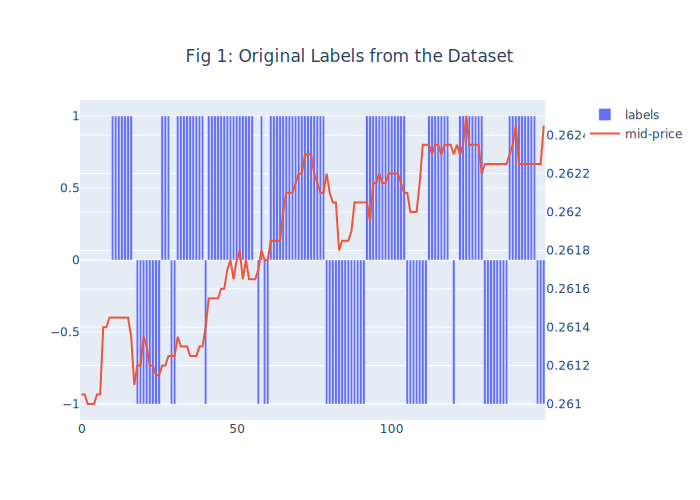

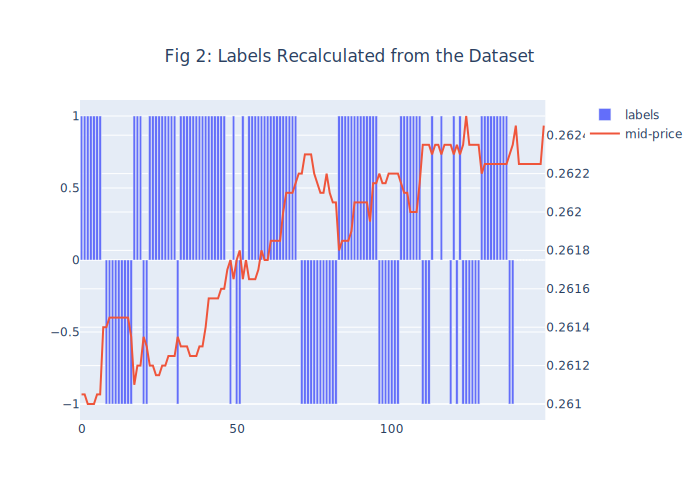

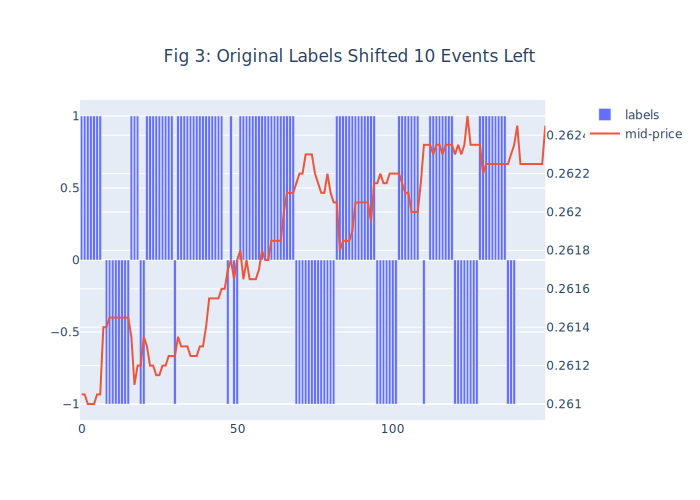

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_start = 0
n_rows = 150
n_end = n_start + n_rows
ap = data[0, n_start:n_end]
bp = data[2, n_start:n_end]
# mid-price for best bid and ask (order book level 1)
mp = (ap + bp) / 2
# mapping the labels to range [-1: downward, 0: neutral, +1: upward]
y = 2 - data[-1, n_start:n_end]

thresh = 2e-5

y2 = np.zeros(y.shape[0])
for i in range(0, n_rows - 10):
    mp0 = np.average(mp[i])
    m_plus = np.average(mp[i + 1:i + 10 + 1])
    chg = (m_plus - mp0) / mp0
    if chg >= thresh:
        y2[i] = 1
    elif chg <= -thresh:
        y2[i] = -1
    else:
        y2[i] = 0

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(y=y, name='labels'))
fig.add_trace(go.Scatter(y=mp, mode="lines", name='mid-price'), secondary_y=True)
fig.update_layout(title={
    'text': "Fig 1: Original Labels from the Dataset",
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig.show(renderer="svg")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(y=y2, name='labels'))
fig.add_trace(go.Scatter(y=mp, mode="lines", name='mid-price'), secondary_y=True)
fig.update_layout(title={
    'text': "Fig 2: Labels Recalculated from the Dataset",
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig.show(renderer="svg")

# shifting classification data 10 events to the left
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(y=y[10:], name='labels'))
fig.add_trace(go.Scatter(y=mp, mode="lines", name='mid-price'), secondary_y=True)
fig.update_layout(title={
    'text': "Fig 3: Original Labels Shifted 10 Events Left",
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig.show(renderer="svg")